In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

In [2]:
(x_train, y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [3]:
x=pd.DataFrame(y_train)
x[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

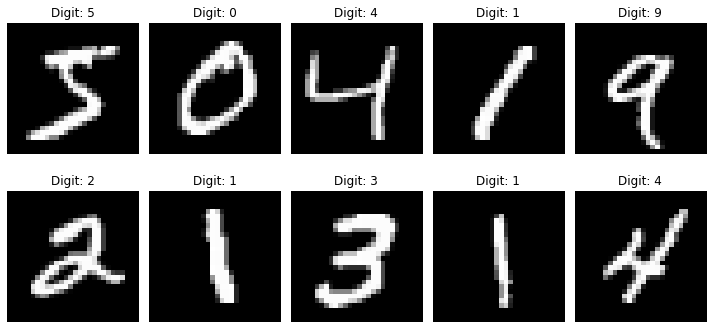

In [4]:
plt.figure(figsize=(10, 5))
for i in range(10):  # Display the first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x.value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
x=pd.DataFrame(y_train)
x[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

THE PIXELS OF A IMAGE 

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train[0].dtype

dtype('uint8')

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

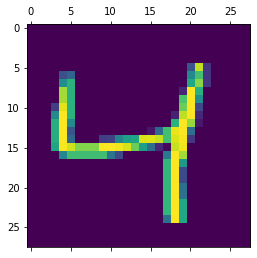

In [12]:
plt.matshow(x_train[2])

In [13]:
y_train[2]

4

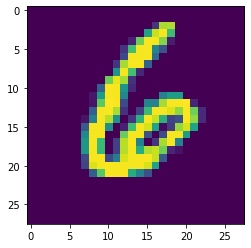

In [14]:
plt.imshow(x_train[13])

In [15]:
y_train[13]

6

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train= x_train/255
x_test = x_test/255

In [18]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

FLATTENING

In [19]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)


x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [20]:
x_train_flattened.shape

(60000, 784)

In [21]:
x_test_flattened.shape

(10000, 784)

TRAINING OUR MODEL

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4875 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3054 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2748 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2680 - accuracy: 0.9259


PREDICTING AND EVALUATING OUR MODEL BY TESTING

In [23]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2662 - accuracy: 0.9259


[0.2662458121776581, 0.9258999824523926]

In [24]:
model.predict(x_test_flattened)

array([[1.2144351e-05, 1.3614893e-10, 4.7145964e-05, ..., 7.7208662e-01,
        8.8752204e-05, 7.8159571e-04],
       [1.7282367e-04, 1.4942473e-06, 5.3694558e-01, ..., 2.8362311e-16,
        7.6178563e-05, 4.7724124e-13],
       [1.2186669e-06, 5.0711191e-01, 6.8282187e-03, ..., 1.0140538e-03,
        3.3361912e-03, 2.7897954e-04],
       ...,
       [1.9087421e-11, 5.8347549e-11, 8.4223357e-09, ..., 4.7593580e-06,
        2.1208947e-05, 5.8444850e-05],
       [8.9823899e-09, 3.5863316e-08, 1.7994383e-08, ..., 8.4990859e-09,
        4.0450692e-04, 2.6630927e-08],
       [3.6550297e-08, 1.9179054e-15, 1.1878033e-06, ..., 1.0521861e-13,
        1.7189488e-09, 3.1579615e-12]], dtype=float32)

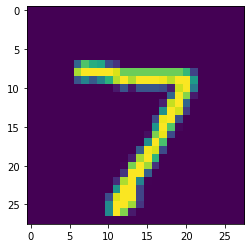

In [25]:
plt.imshow(x_test[0])

In [26]:
y_predict=model.predict(x_test_flattened)
y_predict[0]


array([1.21443509e-05, 1.36148925e-10, 4.71459643e-05, 8.50316882e-03,
       1.22338292e-06, 1.09991386e-04, 1.44898893e-09, 7.72086620e-01,
       8.87522037e-05, 7.81595707e-04], dtype=float32)

In [27]:
np.argmax(y_predict[0])

7

In [28]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [29]:
y_predicted_labels= [np.argmax(i) for i in y_predict]
y_predicted_labels[0:5]

[7, 2, 1, 0, 4]

In [30]:
cm =tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    1,    0,    6,   10,    3,    3,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   4,   10,  913,   15,    5,    4,   14,   12,   51,    4],
       [   2,    0,   17,  911,    0,   29,    4,   14,   27,    6],
       [   1,    1,    2,    1,  905,    0,   15,    4,   10,   43],
       [   7,    2,    2,   28,    7,  780,   19,    4,   35,    8],
       [   6,    3,    6,    1,    7,    9,  921,    2,    3,    0],
       [   1,    7,   21,    4,    5,    1,    0,  952,    3,   34],
       [   4,    8,    5,   13,    9,   22,   10,   12,  884,    7],
       [   9,    7,    1,    9,   18,    7,    0,   24,   12,  922]])>

Text(69.0, 0.5, 'Truth')

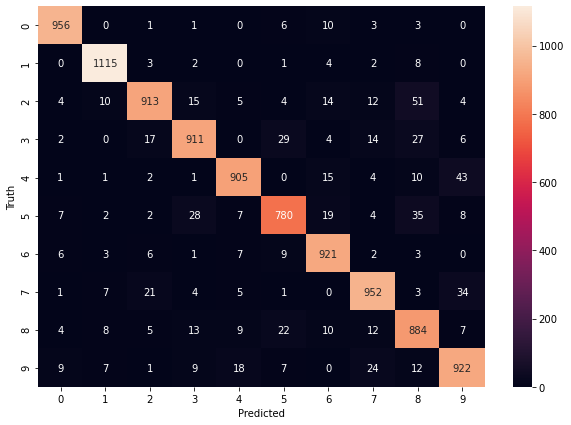

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ADDING HIDDEN LAYER

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2892 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1308 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9773
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0589 - accuracy: 0.9823


In [33]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9728


[0.08839710801839828, 0.9728000164031982]

In [34]:
y_predict = model.predict(x_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predict]

In [35]:
y_predicted_labels

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 8,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 2,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 5,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 2,
 4,
 2,


In [36]:
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [37]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    1,    9,    2,    1,    3,    4,    2,    4,    0],
       [   0, 1125,    4,    0,    0,    1,    1,    1,    3,    0],
       [   2,    3, 1014,    0,    2,    0,    2,    3,    6,    0],
       [   0,    1,   11,  973,    1,    7,    0,    5,   10,    2],
       [   0,    0,    8,    0,  962,    0,    1,    4,    1,    6],
       [   2,    0,    0,    9,    2,  867,    3,    1,    7,    1],
       [   2,    4,    1,    1,    5,    6,  938,    0,    1,    0],
       [   0,    5,   15,    1,    1,    0,    0, 1000,    3,    3],
       [   2,    1,    5,    7,    4,    2,    3,    4,  946,    0],
       [   2,    6,    1,   11,   14,    5,    0,   11,   10,  949]])>

Text(69.0, 0.5, 'Truth')

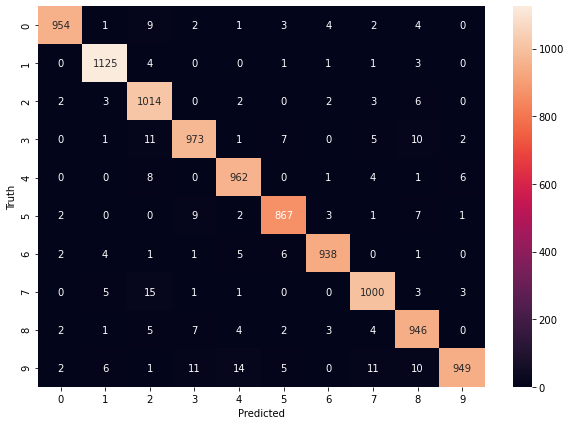

In [38]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

MAKING FLATTENED LAYER DIRECTLY IN THE MODEL SO WE DON'T HAVE TO RESHAPE

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2970 - accuracy: 0.9180
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1392 - accuracy: 0.9595
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1002 - accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0780 - accuracy: 0.9772
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0634 - accuracy: 0.9811


In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(100,  activation='relu'),
    tf.keras.layers.Dense(10,  activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2724 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1167 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0841 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0547 - accuracy: 0.9827


In [41]:
y_predict = model.predict(x_test)
y_predicted_labels= [np.argmax(i) for i in y_predict]

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

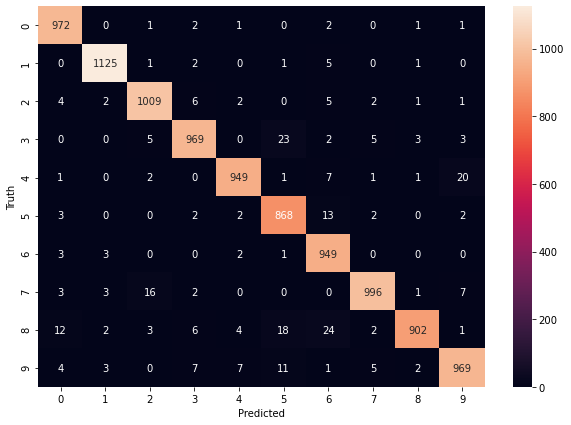

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
model.save("digit_recoginition.h5")